In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read Data from CSV file
data = pd.read_csv('Dataset.csv')
#show Sample of data
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
#show data details
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


<AxesSubplot:xlabel='Population', ylabel='Profit'>

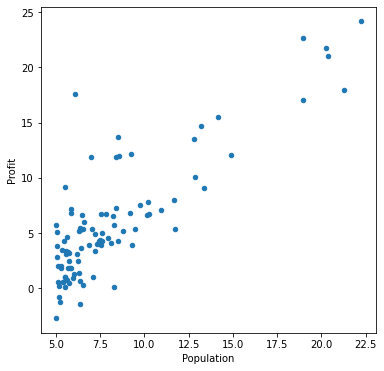

In [4]:
#draw data
data.plot(kind='scatter', x='Population', y='Profit', figsize=(6,6))

In [5]:
# adding a new column called ones before the data
data.insert(0, 'Ones', 1)
#show Sample of data after update
data.head()

,Ones,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [6]:
# separate X (training data) 'Input' from y (target variable) 'Output'
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

In [7]:
# Show sample of X Dataframe
X.head() 

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [8]:
# Show sample of y Dataframe
y.head() 

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [9]:
# convert from data frames to numpy matrices
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

In [10]:
def computeCost(X, y, theta):
    z = np.power(((X * theta.T) - y), 2)
#    print('z \n',z)
#    print('m ' ,len(X))
    return np.sum(z) / (2 * len(X))

computeCost(X, y, theta)

32.072733877455676

In [11]:
# GD function
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost

In [12]:
# initialize variables for learning rate and iterations
alpha = 0.01
iters = 1000

# perform gradient descent to "fit" the model parameters
g, cost = gradientDescent(X, y, theta, alpha, iters)

#print('g = ' , g)
#print('cost  = ' , cost[-1] )

#Disply compute Cost
computeCost(X, y, g)

4.515955503078912

In [13]:
# get best fit line
x = np.linspace(data.Population.min(), data.Population.max(), 100)
# point of fit line 
f = g[0, 0] + (g[0, 1] * x)
#Display point of fit line 
f

array([ 2.42539308,  2.62097407,  2.81655506,  3.01213605,  3.20771704,
        3.40329803,  3.59887902,  3.79446001,  3.990041  ,  4.18562199,
        4.38120298,  4.57678397,  4.77236495,  4.96794594,  5.16352693,
        5.35910792,  5.55468891,  5.7502699 ,  5.94585089,  6.14143188,
        6.33701287,  6.53259386,  6.72817485,  6.92375584,  7.11933683,
        7.31491782,  7.51049881,  7.7060798 ,  7.90166079,  8.09724177,
        8.29282276,  8.48840375,  8.68398474,  8.87956573,  9.07514672,
        9.27072771,  9.4663087 ,  9.66188969,  9.85747068, 10.05305167,
       10.24863266, 10.44421365, 10.63979464, 10.83537563, 11.03095662,
       11.2265376 , 11.42211859, 11.61769958, 11.81328057, 12.00886156,
       12.20444255, 12.40002354, 12.59560453, 12.79118552, 12.98676651,
       13.1823475 , 13.37792849, 13.57350948, 13.76909047, 13.96467146,
       14.16025245, 14.35583344, 14.55141442, 14.74699541, 14.9425764 ,
       15.13815739, 15.33373838, 15.52931937, 15.72490036, 15.92

Text(0.5, 1.0, 'Predicted Profit vs. Population Size')

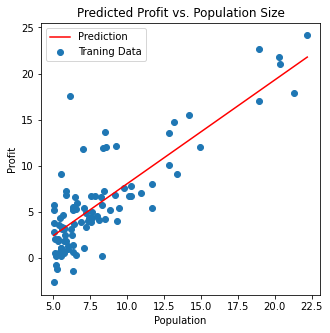

In [14]:
# draw the line

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

Text(0.5, 1.0, 'Error vs. Training Epoch')

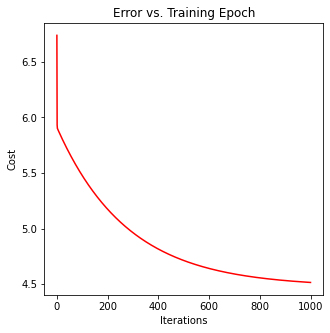

In [15]:
# draw error graph

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')